<a href="https://colab.research.google.com/github/PedroMeerholz/colab-artigo-iniciacaoCientifica/blob/main/Artigo_Github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação das bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from time import time

# Importação do dataset

In [2]:
tabela = pd.read_csv('/content/drive/MyDrive/Projeto de Pesquisa/Artigo/dataset/predictive_maintenance.csv')
tabela.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


# Proposta

## Pré-processamento

In [3]:
falhas_aleatorias = tabela[tabela['Failure Type'] == 'Random Failures'].index
falha_de_desgaste_de_ferramenta = tabela[tabela['Failure Type'] == 'Tool Wear Failure'].index

tabela = tabela.drop(falhas_aleatorias, axis=0)
tabela = tabela.drop(falha_de_desgaste_de_ferramenta, axis=0)

tabela['Failure Type'].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Name: Failure Type, dtype: int64

In [4]:
# Remoção de colunas desnecessárias
colunas = ['UDI', 'Product ID', 'Failure Type']
tabela = tabela.drop(colunas, axis=1)
tabela.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0


In [5]:
# Alterando o tipo da coluna Type de categórico para numérico
tabela['Type'] = tabela['Type'].map({
    'L': 1,
    'M': 2, 
    'H': 3
})

tabela.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,2,298.1,308.6,1551,42.8,0,0
1,1,298.2,308.7,1408,46.3,3,0
2,1,298.1,308.5,1498,49.4,5,0
3,1,298.2,308.6,1433,39.5,7,0
4,1,298.2,308.7,1408,40.0,9,0


In [6]:
x = tabela.drop('Target', axis=1)
y = tabela['Target']

In [7]:
escalador = MinMaxScaler()
x = escalador.fit_transform(x)

In [8]:
x = pd.DataFrame(x)
x.columns = ['Type', 'Air Tempearture [K]', 'Process Temperature [K]', 'Rotational Speed [rpm]', 'Torque [Nm]', 'Tool Wear [min]']
x.head()

,Type,Air Tempearture [K],Process Temperature [K],Rotational Speed [rpm],Torque [Nm],Tool Wear [min]
0,0.5,0.304348,0.358025,0.222934,0.535714,0.000000
1,0.0,0.315217,0.370370,0.139697,0.583791,0.011952
2,0.0,0.304348,0.345679,0.192084,0.626374,0.019920
3,0.0,0.315217,0.358025,0.154249,0.490385,0.027888
4,0.0,0.315217,0.370370,0.139697,0.497253,0.035857


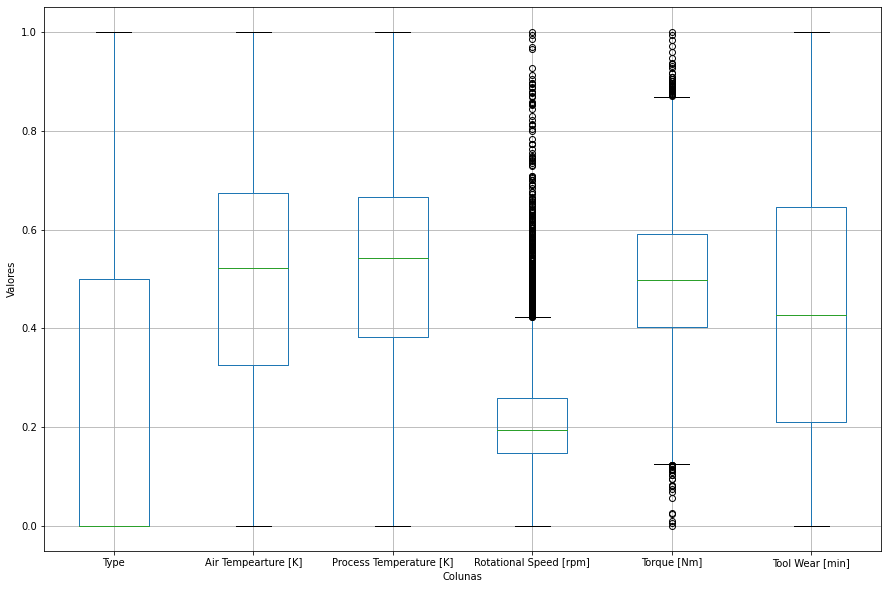

In [15]:
pd.DataFrame(x).boxplot(figsize=(15, 10))
plt.xlabel('Colunas')
plt.ylabel('Valores')
plt.savefig('dimensao-dados.png', format='png')
plt.show()

## Separação dos subconjuntos de treino e teste

In [9]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, random_state=42, stratify=y, train_size=0.75)

## Aplicação dos modelos

### Árvore de Decisão

In [17]:
clf_tree = DecisionTreeClassifier(max_depth=10)
clf_tree.fit(x_treino, y_treino)

predict = clf_tree.predict(x_teste)

resultados = classification_report(y_teste, predict) 
print(resultados)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2411
           1       0.78      0.92      0.84        74

    accuracy                           0.99      2485
   macro avg       0.89      0.96      0.92      2485
weighted avg       0.99      0.99      0.99      2485



In [11]:
export_graphviz(clf_tree, 'tree.dot')
! dot -Tpng tree.dot -o tree.png

### Teorema de Bayes

In [16]:
clf_bayes = GaussianNB()
clf_bayes.fit(x_treino, y_treino)
predict = clf_bayes.predict(x_teste)
print(classification_report(y_teste, predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2411
           1       0.46      0.22      0.29        74

    accuracy                           0.97      2485
   macro avg       0.72      0.60      0.64      2485
weighted avg       0.96      0.97      0.96      2485

